Libraries imported successfully!
Dataset loaded!
Movies: 20
Ratings: 1000
Users: 100

DATA EXPLORATION

Movies Dataset Sample:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings Dataset Sample:
   userId  movieId  rating
0       1        1     3.0
1       1       18     5.0
2       1       16     4.5
3       1        2     4.5
4       1        9     3.0

Missing Values:
Movies: 0
Ratings: 0

Feature engineering completed!

Movies with enriched

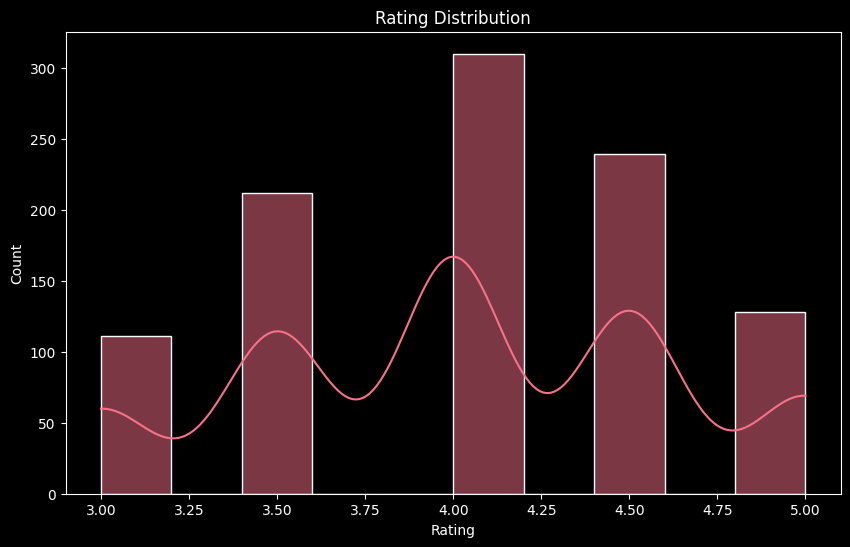

In [2]:
# Movie Recommendation System - Complete Implementation
# MovieLens Dataset Analysis and ML Model Building

# ============================================================================
# 1. IMPORT LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('dark_background')
sns.set_palette("husl")

print("Libraries imported successfully!")

# ============================================================================
# 2. LOAD MOVIELENS DATASET
# ============================================================================

# Option 1: Load from CSV files (if you have downloaded MovieLens dataset)
# movies_df = pd.read_csv('ml-latest-small/movies.csv')
# ratings_df = pd.read_csv('ml-latest-small/ratings.csv')

# Option 2: Sample data for demonstration
movies_data = {
    'movieId': list(range(1, 21)),
    'title': [
        'Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
        'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)',
        'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)',
        'Sudden Death (1995)', 'GoldenEye (1995)', 'American President (1995)',
        'Dracula: Dead and Loving It (1995)', 'Balto (1995)', 'Nixon (1995)',
        'Cutthroat Island (1995)', 'Casino (1995)', 'Sense and Sensibility (1995)',
        'Four Rooms (1995)', 'Ace Ventura (1995)', 'Money Train (1995)'
    ],
    'genres': [
        'Adventure|Animation|Children|Comedy|Fantasy',
        'Adventure|Children|Fantasy',
        'Comedy|Romance',
        'Comedy|Drama|Romance',
        'Comedy',
        'Action|Crime|Thriller',
        'Comedy|Romance',
        'Adventure|Children',
        'Action',
        'Action|Adventure|Thriller',
        'Comedy|Drama|Romance',
        'Comedy|Horror',
        'Adventure|Animation|Children',
        'Drama',
        'Action|Adventure|Romance',
        'Crime|Drama',
        'Drama|Romance',
        'Comedy|Thriller',
        'Comedy',
        'Action|Comedy|Crime|Drama|Thriller'
    ]
}

# Generate sample ratings
np.random.seed(42)
n_users = 100
n_ratings_per_user = 10

ratings_data = []
for user_id in range(1, n_users + 1):
    movie_ids = np.random.choice(range(1, 21), n_ratings_per_user, replace=False)
    for movie_id in movie_ids:
        rating = np.random.choice([3.0, 3.5, 4.0, 4.5, 5.0], p=[0.1, 0.2, 0.3, 0.25, 0.15])
        ratings_data.append({
            'userId': user_id,
            'movieId': movie_id,
            'rating': rating
        })

movies_df = pd.DataFrame(movies_data)
ratings_df = pd.DataFrame(ratings_data)

print(f"Dataset loaded!")
print(f"Movies: {len(movies_df)}")
print(f"Ratings: {len(ratings_df)}")
print(f"Users: {ratings_df['userId'].nunique()}")

# ============================================================================
# 3. DATA EXPLORATION & PREPROCESSING
# ============================================================================

print("\n" + "="*70)
print("DATA EXPLORATION")
print("="*70)

# Display basic info
print("\nMovies Dataset Sample:")
print(movies_df.head())
print("\nRatings Dataset Sample:")
print(ratings_df.head())

# Check for missing values
print("\nMissing Values:")
print(f"Movies: {movies_df.isnull().sum().sum()}")
print(f"Ratings: {ratings_df.isnull().sum().sum()}")

# Extract year from title
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')
movies_df['clean_title'] = movies_df['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

print("\nFeature engineering completed!")

# Calculate rating statistics
rating_stats = ratings_df.groupby('movieId').agg({
    'rating': ['mean', 'count', 'std']
}).reset_index()
rating_stats.columns = ['movieId', 'avg_rating', 'rating_count', 'rating_std']

# Merge with movies
movies_enriched = movies_df.merge(rating_stats, on='movieId', how='left')
movies_enriched['avg_rating'] = movies_enriched['avg_rating'].fillna(0)
movies_enriched['rating_count'] = movies_enriched['rating_count'].fillna(0)
movies_enriched['rating_std'] = movies_enriched['rating_std'].fillna(0)

print(f"\nMovies with enriched data: {len(movies_enriched)}")
print("\nSample enriched data:")
print(movies_enriched[['clean_title', 'genres', 'avg_rating', 'rating_count']].head())

# ============================================================================
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n" + "="*70)
print("EXPLORATORY DATA ANALYSIS")
print("="*70)

# Rating distribution
print("\nRating Distribution:")
print(ratings_df['rating'].value_counts().sort_index())
print(f"\nMean Rating: {ratings_df['rating'].mean():.2f}")
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['rating'], bins=10, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()